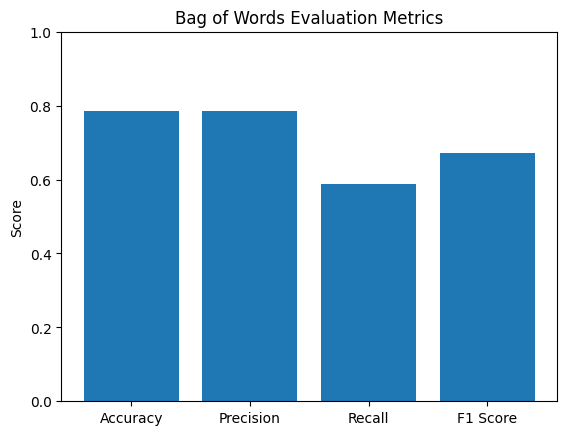

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv('train.csv', nrows=100000)

# Define the feature extractor using CountVectorizer
vectorizer = CountVectorizer()

# Extract the features from the text
X = vectorizer.fit_transform(data['question1'] + ' ' + data['question2'])
y = data['is_duplicate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a bar chart
fig, ax = plt.subplots()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]
ax.bar(metrics, scores)
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Bag of Words Evaluation Metrics')
plt.show()

In [11]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7841
Precision: 0.7854867256637168
Recall: 0.5882820784729587
F1 Score: 0.6727300288009701


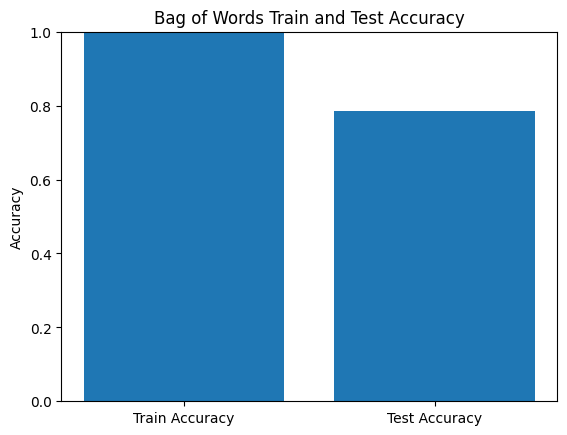

In [14]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv', nrows=100000)

# Define the feature extractor using CountVectorizer
vectorizer = CountVectorizer()

# Extract the features from the text
X = vectorizer.fit_transform(data['question1'] + ' ' + data['question2'])
y = data['is_duplicate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data and get the train accuracy
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
train_acc = accuracy_score(y_train, rfc.predict(X_train))

# Get the test accuracy
test_acc = accuracy_score(y_test, rfc.predict(X_test))

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc])
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.set_title('Bag of Words Train and Test Accuracy')
plt.show()

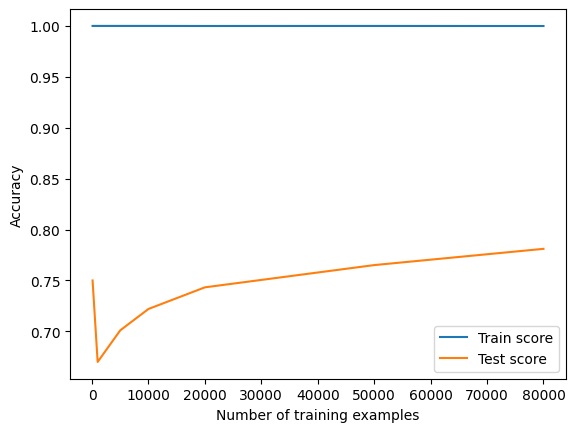

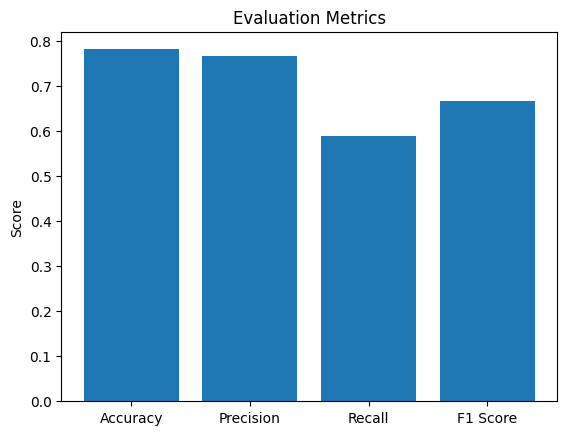

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

# Create the bag of words representation of the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data['question1'] + train_data['question2'])

# Define the labels for the data
y = train_data['is_duplicate']

# Initialize an empty list to store the train and test scores
train_scores = []
test_scores = []

# Define a list of different subset sizes to use for training the model
subset_sizes = [100, 1000, 5000, 10000, 20000, 50000, 80000]

# Train a random forest classifier on different subsets of the training data
for subset_size in subset_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[:subset_size], y[:subset_size], test_size=0.2, random_state=42)

    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the train and test scores to the lists
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(accuracy)

# Plot the train and test scores against the number of training examples
plt.plot(subset_sizes, train_scores, label='Train score')
plt.plot(subset_sizes, test_scores, label='Test score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the evaluation metrics for the final model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.bar(metrics, scores)
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()